In [37]:
# This is basically a simplified example of what happens in prec_stats.py
import sys
sys.path.append('../python_scripts')
from helpers import get_config
from cosmo_utils.pyncdf import getfobj_ncdf
from cosmo_utils.diag import identify_clouds
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [75]:
# Load example data
raw_dir = '/project/meteo/scratch/users/stephan.rasp/convective_variability_data/raw_data/'
date = '2016060500'
time = '00140000'
# File name of first ensemble member
netcdf_fn = (raw_dir + date + '/deout_ceu_pspens/' + '1' + 
             '/OUTPUT/lfff' + time + '.nc_30m_surf')
prec_field = getfobj_ncdf(netcdf_fn, fieldn = 'PREC_ACCUM').data
# Crop field
prec_field = prec_field[50:-51, 50:-51]

# Load radar field
radar_fn = '/project/meteo/w2w/A6/radolan/netcdf_cosmo_de/raa01-rw_10000-1606051350-dwd---bin.nc'
prec_field_radar = getfobj_ncdf(radar_fn, fieldn='pr', 
                                dwdradar=True).data
prec_field_radar = prec_field_radar[112:-93, 72:-93]
print prec_field.shape
print prec_field_radar.shape

(256, 256)
(256, 256)


In [76]:
# Crop field and create binary field and plot both 
prec_field = prec_field_radar
prec_field[prec_field > 100] = 0
thresh = 1.
bin_field = prec_field > thresh

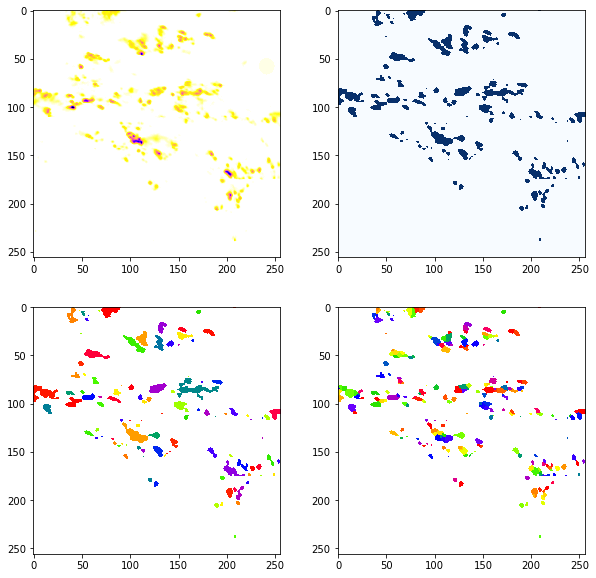

In [77]:
# Identify cloud objects
labels, cld_size_list, cld_prec_list = \
        identify_clouds(prec_field, thresh, water=False, dx=2.8e3)
labels_sep, cld_size_sep_list, cld_prec_sep_list = \
        identify_clouds(prec_field, thresh, water=True, dx=2.8e3)
fig, axmat = plt.subplots(2, 2, figsize=(10, 10))
axmat[0, 0].imshow(prec_field, cmap='gnuplot2_r')
axmat[0, 1].imshow(bin_field, cmap='Blues')
plot_labels = np.array(labels, dtype=float)
plot_labels[labels == 0] = np.nan
axmat[1, 0].imshow(plot_labels, cmap='prism')
plot_labels_sep = np.array(labels_sep, dtype=float)
plot_labels_sep[labels_sep == 0] = np.nan
axmat[1, 1].imshow(plot_labels_sep, cmap='prism')

[  0.00000000e+00   7.97288136e+06   1.59457627e+07   2.39186441e+07
   3.18915254e+07   3.98644068e+07   4.78372881e+07   5.58101695e+07
   6.37830508e+07   7.17559322e+07   7.97288136e+07   8.77016949e+07
   9.56745763e+07   1.03647458e+08   1.11620339e+08   1.19593220e+08
   1.27566102e+08   1.35538983e+08   1.43511864e+08   1.51484746e+08
   1.59457627e+08   1.67430508e+08   1.75403390e+08   1.83376271e+08
   1.91349153e+08   1.99322034e+08   2.07294915e+08   2.15267797e+08
   2.23240678e+08   2.31213559e+08   2.39186441e+08   2.47159322e+08
   2.55132203e+08   2.63105085e+08   2.71077966e+08   2.79050847e+08
   2.87023729e+08   2.94996610e+08   3.02969492e+08   3.10942373e+08
   3.18915254e+08   3.26888136e+08   3.34861017e+08   3.42833898e+08
   3.50806780e+08   3.58779661e+08   3.66752542e+08   3.74725424e+08
   3.82698305e+08   3.90671186e+08   3.98644068e+08   4.06616949e+08
   4.14589831e+08   4.22562712e+08   4.30535593e+08   4.38508475e+08
   4.46481356e+08   4.54454237e+08

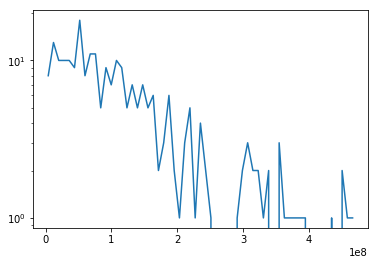

In [78]:
# Plot histograms
prec_freq_binedges = [0, 0.1, 0.2, 0.5, 1, 2, 5, 10, 1000]
dx = 2.8e3   # TODO: Estimate error
nbins = 60
cld_size_sep_binedges = np.linspace(0, dx**2 * nbins, nbins)
cld_prec_sep_binedges = np.linspace(0, 1e9, nbins)
cld_size_binedges = cld_size_sep_binedges * 3.5
cld_prec_binedges = cld_prec_sep_binedges * 3.5

cld_hist_sep = np.histogram(cld_size_sep_list, cld_size_sep_binedges)[0]
right_edges = cld_size_sep_binedges[1:]
x = right_edges - np.diff(right_edges)[0] / 2
print cld_size_sep_binedges
print np.sort(cld_size_sep_list)

fig, ax = plt.subplots(1, 1)
ax.plot(x, cld_hist_sep)
ax.set_yscale('log')